# Neste jupyter busco por um lista de palavras no Twitter armazenando no MongoDb e gerando uma nuvem de palvras

In [48]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from pymongo import MongoClient
from datetime import datetime
import json

In [39]:
# dados da app criado no twitter
consumer_key='OlCf2aq2uZsbMxqGxHtdfvTZzo'
consumer_secret = 'Mks39FdcBGv3DoeAU1IIxyAb1kRPz4qTxGRsRkdpKweFXDGEbxm'
access_token = '48156422-GPh0nhdZCWc5gAqkgmALfVb3wXpOU5M20swbGxudc1'
access_token_secret = 'DxhyLDWdglKjMTgCCPA2prh8yudqD1yXfBnYWl3l7rY9vl'

In [40]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [41]:
# dados serão transformados em objeto para inserir na base de dados.
class MyListener(StreamListener):
    def on_data(self, dados):
        tweet = json.loads(dados)
        created_at = tweet['created_at']
        id_str = tweet['id_str']
        text = tweet['text']
        obj={'tweet':tweet,'created_at':created_at,'id_str':id_str,'text':text,}
        tweetind = col.insert_one(obj).inserted_id          
        return True

In [42]:
myListener=MyListener()
mystream = Stream(auth,listener=myListener)

In [43]:
# criando conexão
cliente = MongoClient('10.10.20.25',27017)

In [44]:
# criando o banco de dados
db = cliente.twitterdb

In [45]:
# criando a collection col
col=db.wordclound

In [55]:
# listas de palavras a ser procuradas
lst_palavras = ['Python','Machine Learning','Deep Learning','Data Science']

In [ ]:
# obtendo dados twitter
mystream.filter(track=lst_palavras)

In [52]:
# realiza a desconexão
mystream.disconnect()

In [56]:
# verifica um documento no collection
col.find_one()

{'_id': ObjectId('5c90eb0af13987449842b6f5'),
 'tweet': {'created_at': 'Tue Mar 19 13:13:41 +0000 2019',
  'id': 1107993546592866304,
  'id_str': '1107993546592866304',
  'text': "Any #python people know why the 'setUp' and other methods in the 'unittesting' module don't follow snake case like… https://t.co/NGfQg2s0vC",
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'truncated': True,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 337944341,
   'id_str': '337944341',
   'name': 'Lawrence Gripper',
   'screen_name': 'lawrencegripper',
   'location': 'England, United Kingdom',
   'url': 'http://gripdev.wordpress.com',
   'description': 'Software Engineer at Microsoft, previously working at @altitudeangel building things for drones. Opinions are my own.',
   'translator_type': 'none',
   'protected': False,
   've

## Análise de dados com Scikit-Learn

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
# dataset com os dados do mongodb
dataset = [{'tweet':item['tweet'],'created_at':item['created_at'],'text':item['text'],} for item in col.find()]

In [59]:
df = pd.DataFrame(dataset)
df

,created_at,text,tweet
0,Tue Mar 19 13:13:41 +0000 2019,Any #python people know why the 'setUp' and ot...,{'created_at': 'Tue Mar 19 13:13:41 +0000 2019...
1,Tue Mar 19 13:13:45 +0000 2019,RT @RealJamesWoods: This is Monty Python level...,{'created_at': 'Tue Mar 19 13:13:45 +0000 2019...
2,Tue Mar 19 13:13:47 +0000 2019,“PythonだけでIoTのPoCを組める、「Degu」はWeb系エンジニア向けのIoTセン...,{'created_at': 'Tue Mar 19 13:13:47 +0000 2019...
3,Tue Mar 19 13:13:59 +0000 2019,RT @BuzzTechy: Udemy Tableau Course : Tableau ...,{'created_at': 'Tue Mar 19 13:13:59 +0000 2019...
4,Tue Mar 19 13:14:00 +0000 2019,Azure Machine Learning service now supports NV...,{'created_at': 'Tue Mar 19 13:14:00 +0000 2019...
5,Tue Mar 19 13:14:01 +0000 2019,RT @pacerecruiters: What Is Deep Learning AI? ...,{'created_at': 'Tue Mar 19 13:14:01 +0000 2019...
6,Tue Mar 19 13:14:02 +0000 2019,RT @matalaz: Fun fact: just when you thought t...,{'created_at': 'Tue Mar 19 13:14:02 +0000 2019...
7,Tue Mar 19 13:14:02 +0000 2019,RT @PulseLabJakarta: Understanding how decisio...,{'created_at': 'Tue Mar 19 13:14:02 +0000 2019...
8,Tue Mar 19 13:14:04 +0000 2019,RT @EricTopol: A randomized trial of deep lear...,{'created_at': 'Tue Mar 19 13:14:04 +0000 2019...
9,Tue Mar 19 13:14:05 +0000 2019,RT @BBCkatyaadler: EU has almost given up tryi...,{'created_at': 'Tue Mar 19 13:14:05 +0000 2019...


In [70]:
# Contando palavras
cv=CountVectorizer()
count_matrix = cv.fit_transform(df.text)

word_count = pd.DataFrame(cv.get_feature_names(),columns=['palavras'])
word_count['qtd'] = count_matrix.sum(axis=0).tolist()[0]
word_count=word_count.sort_values("qtd",ascending=False).reset_index(drop=True)
word_count[:10]

,palavras,qtd
0,https,97
1,co,96
2,rt,84
3,python,55
4,learning,44
5,the,43
6,to,43
7,is,39
8,and,30
9,in,27


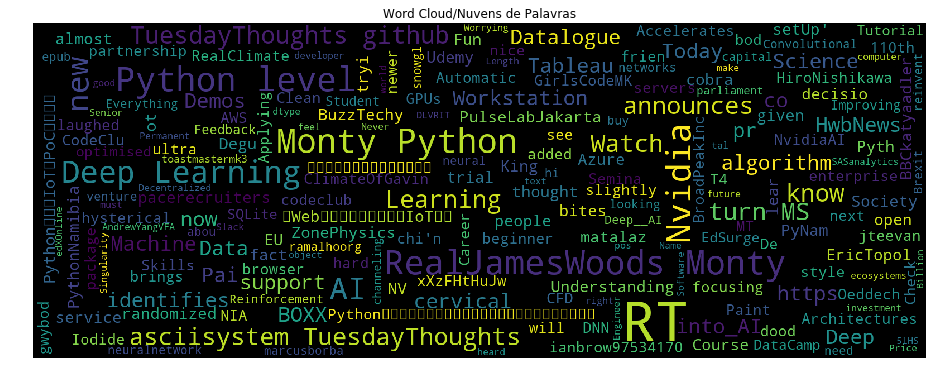

In [73]:
# formando a nuvem de palavras
# WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wd = WordCloud(max_font_size=100, width=1600, height=600,background_color='black').generate(str(df['text']))
plt.figure(figsize=(16,9))
plt.imshow(wd)
plt.axis("off")
plt.title("Word Cloud/Nuvens de Palavras")
plt.show()